In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import joblib

C:\Users\patil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\patil\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'D:\Oasis\TASK 6\WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
print("Missing value per column")
df.isna().sum()

Missing value per column


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
if 'quality' not in df.columns:
    raise ValueError("Expected a column named 'quality'")
print("Quality distribution:")
print(df['quality'].value_counts().sort_index())

df['quality_binary'] = (df['quality'] >= 7).astype(int)

print("\nBinary label distribution:")
print(df['quality_binary'].value_counts())


Quality distribution:
quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

Binary label distribution:
quality_binary
0    984
1    159
Name: count, dtype: int64


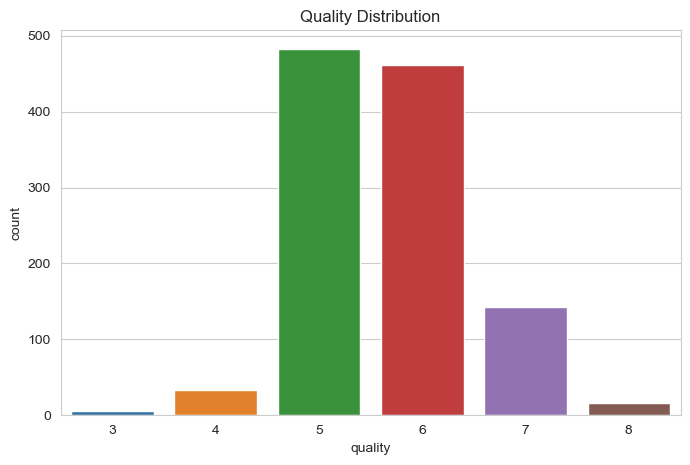

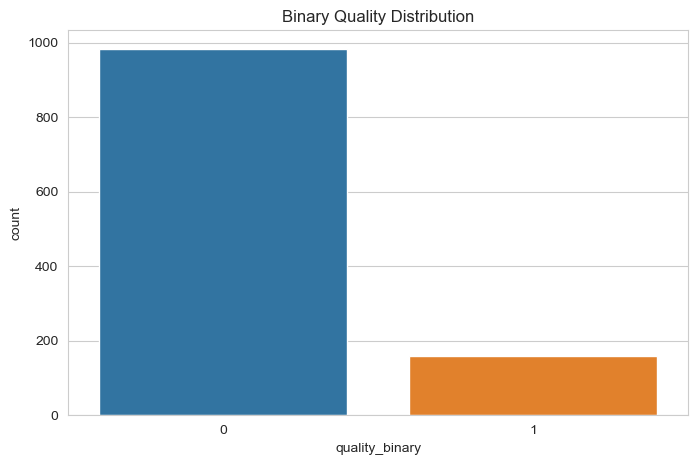

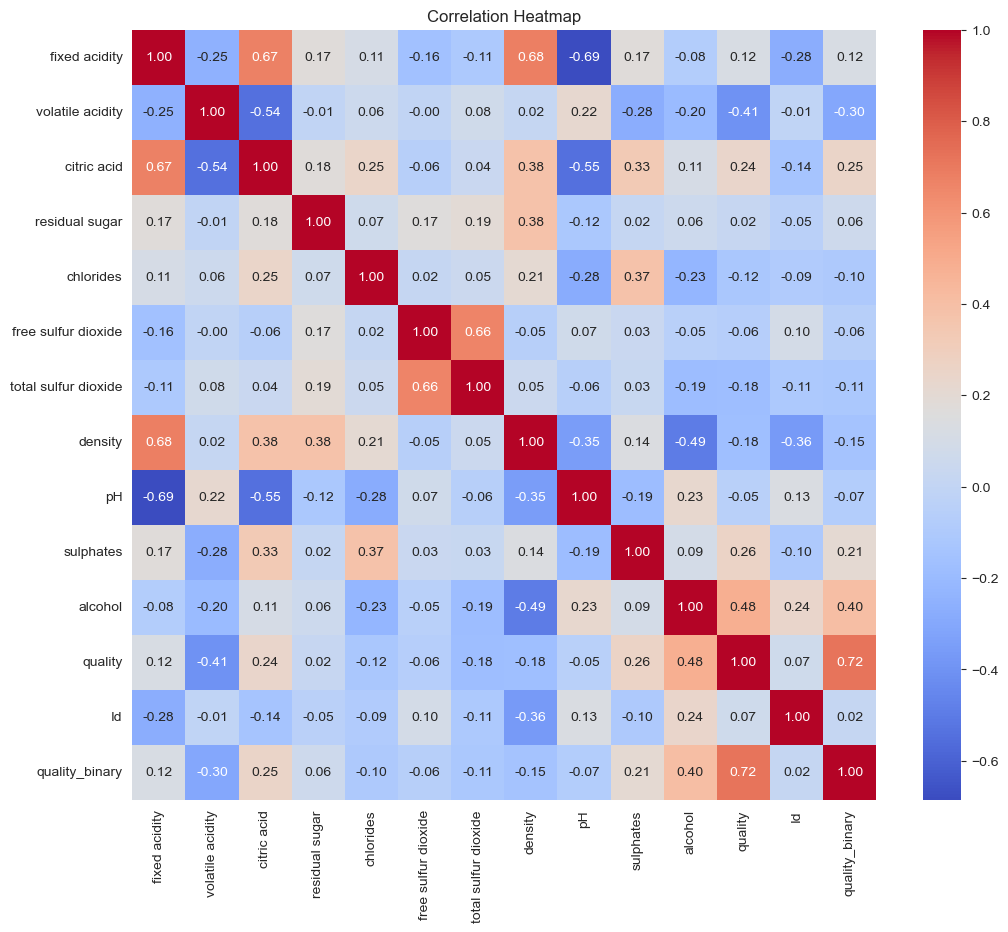

In [7]:
# Visualizations
sns.set_style("whitegrid")

plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df)
plt.title("Quality Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='quality_binary', data=df)
plt.title("Binary Quality Distribution")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Prepare data
FEATURE_COLS = [col for col in df.columns if col not in ['quality', 'quality_binary']]

X = df[FEATURE_COLS].values
y = df['quality'].values  # multiclass target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)
print("\nFeatures used:", FEATURE_COLS)


Training set: (914, 12)
Testing set: (229, 12)

Features used: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'Id']


In [9]:
#  Classifier pipelines

# Random Forest
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))])
# SGDClassifier
pipe_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(max_iter=5000, tol=1e-3, random_state=42))])

# SVC
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))])

models = {
    "RandomForest": pipe_rf,
    "SGDClassifier": pipe_sgd,
    "SVC": pipe_svc
}



--- Training RandomForest ---
RandomForest Accuracy: 0.7162
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.73      0.85      0.78        97
           6       0.68      0.73      0.71        92
           7       0.79      0.52      0.62        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.37      0.35      0.35       229
weighted avg       0.68      0.72      0.69       229



C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 600x400 with 0 Axes>

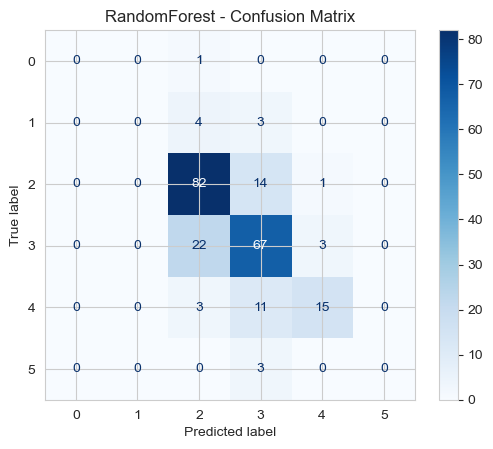


--- Training SGDClassifier ---
SGDClassifier Accuracy: 0.5677
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.71      0.69        97
           6       0.58      0.45      0.50        92
           7       0.37      0.69      0.48        29
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.27      0.31      0.28       229
weighted avg       0.56      0.57      0.56       229



C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 600x400 with 0 Axes>

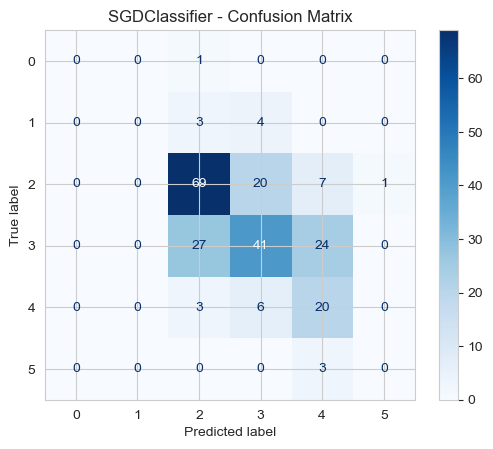


--- Training SVC ---
SVC Accuracy: 0.6725
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.71      0.82      0.76        97
           6       0.63      0.70      0.66        92
           7       0.71      0.34      0.47        29
           8       0.00      0.00      0.00         3

    accuracy                           0.67       229
   macro avg       0.34      0.31      0.31       229
weighted avg       0.64      0.67      0.65       229



C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 600x400 with 0 Axes>

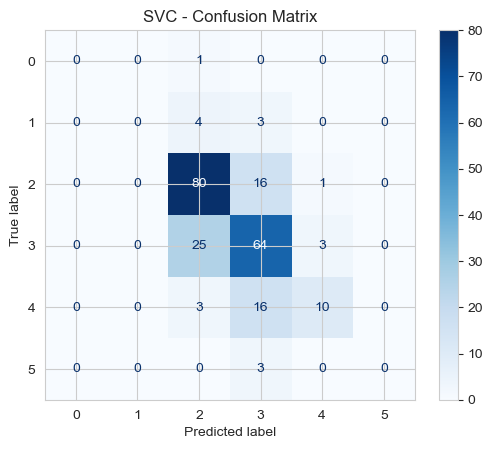

In [10]:
# 8. Train & evaluate
results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))
    
    # Confusion Matrix
    plt.figure(figsize=(6,4))
    ConfusionMatrixDisplay(confusion_matrix(y_test, preds)).plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [11]:
# 9. Cross-validation
for name, model in models.items():
    print(f"\nCross-validating {name}...")
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} CV Mean Accuracy: {scores.mean():.4f}")



Cross-validating RandomForest...
RandomForest CV Mean Accuracy: 0.5425

Cross-validating SGDClassifier...
SGDClassifier CV Mean Accuracy: 0.5372

Cross-validating SVC...
SVC CV Mean Accuracy: 0.5835


In [12]:
# 10. Hyperparameter tuning

# Random Forest Grid
rf_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20]
}

rf_search = GridSearchCV(pipe_rf, rf_grid, cv=4, scoring='accuracy', n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Best RF Params:", rf_search.best_params_)
print("Best RF Accuracy:", rf_search.best_score_)

# SVC Grid
svc_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['rbf', 'linear']
}

svc_search = GridSearchCV(pipe_svc, svc_grid, cv=4, scoring='accuracy', n_jobs=-1)
svc_search.fit(X_train, y_train)

print("Best SVC Params:", svc_search.best_params_)
print("Best SVC Accuracy:", svc_search.best_score_)


Best RF Params: {'rf__max_depth': None, 'rf__n_estimators': 200}
Best RF Accuracy: 0.6444543399984678
Best SVC Params: {'svc__C': 1, 'svc__kernel': 'rbf'}
Best SVC Accuracy: 0.6094767486401593


In [13]:
# 11. Save models
joblib.dump(rf_search.best_estimator_, "best_random_forest.joblib")
joblib.dump(svc_search.best_estimator_, "best_svc.joblib")
joblib.dump(pipe_sgd, "baseline_sgd.joblib")

print("Models saved successfully.")


Models saved successfully.


In [14]:
# 12. Example prediction
sample = X_test[0].reshape(1, -1)

print("Sample Prediction:")
print("RF:", rf_search.best_estimator_.predict(sample)[0])
print("SVC:", svc_search.best_estimator_.predict(sample)[0])
print("SGD:", pipe_sgd.predict(sample)[0])


Sample Prediction:
RF: 6
SVC: 6
SGD: 6
